In [1]:
###Imports###
from lib import RoLib
import matplotlib.pyplot as plt
import random
import statistics
import math
from scipy.stats import t

In [2]:
board_size = 10
fleet = ['Battleship', 'Cruiser', 'Destroyer', 'Submarine', 'Patrol Boat']
fleet_shapes = [1, 1, 1, 1, 1]
fleet_size = len(fleet)

#Print Fleet info
print('Fleet:', fleet)
print('There are ', fleet_size, 'ships in the fleet,')
print('of  lengths', fleet_shapes, '.')
print('The board is a square with length', board_size, '.')

#How many boards are possible?
combos = RoLib.calculate_simple_combinations(board_size, fleet_size)
print('In this simple game of Battleship, each player has', f"{combos:,}", 'possible boards.')

Fleet: ['Battleship', 'Cruiser', 'Destroyer', 'Submarine', 'Patrol Boat']
There are  5 ships in the fleet,
of  lengths [1, 1, 1, 1, 1] .
The board is a square with length 10 .
In this simple game of Battleship, each player has 75,287,520 possible boards.


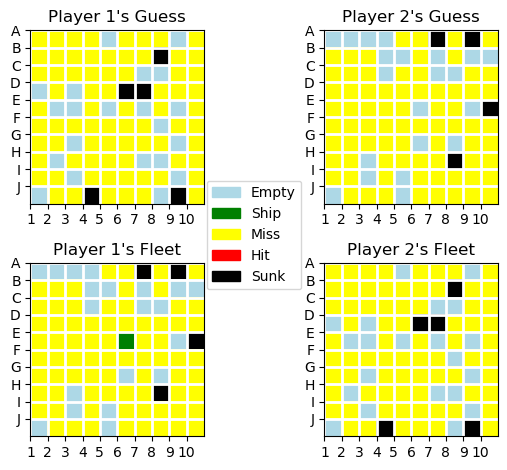

Player 1 wins!


In [2]:
### Simple Game  ###
RoLib.simple_game()

Number of combinations: 75287520.0


Mean turns: 84.151923
Median turns: 88.0
Standard deviation of turns: 13.801310042102159
95% Confidence Interval: (84.12487289663748, 84.17897310336251)


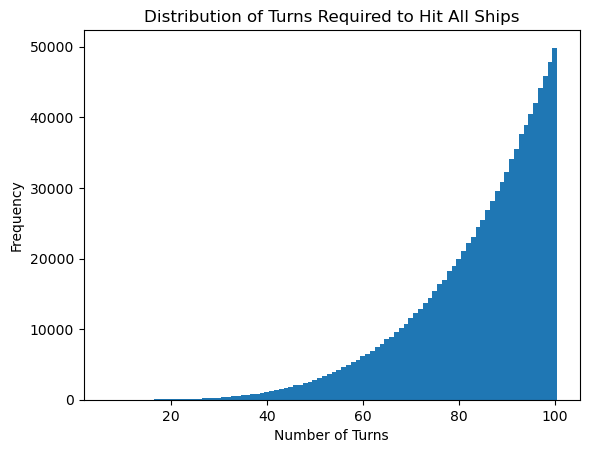

<Figure size 640x480 with 0 Axes>

In [19]:
### Monte Carlo simulation of SBS games ###
# Calculates the distribution of turns needed to complete games

num_games = 1000000
turns_required = []

for _ in range(num_games):
    tiles_remaining = list(range(100))
    ships = random.sample(tiles_remaining, 5)
    turns = 0

    while ships:
        turns += 1
        shot = random.choice(tiles_remaining)
        tiles_remaining.remove(shot)
        if shot in ships:
            ships.remove(shot)

    turns_required.append(turns)

mean_turns = statistics.mean(turns_required)
median_turns = statistics.median(turns_required)
std_dev_turns = statistics.stdev(turns_required)

confidence_level = 0.95
t_value = t.ppf((1 + confidence_level) / 2, num_games - 1)
margin_error = t_value * std_dev_turns / math.sqrt(num_games)
confidence_interval = (mean_turns - margin_error, mean_turns + margin_error)

print("Mean turns:", mean_turns)
print("Median turns:", median_turns)
print("Standard deviation of turns:", std_dev_turns)
print("95% Confidence Interval:", confidence_interval)

# Plotting the distribution
plt.hist(turns_required, bins=range(min(turns_required), max(turns_required) + 2), align='left')
plt.xlabel("Number of Turns")
plt.ylabel("Frequency")
plt.title("Distribution of Turns Required to Hit All Ships")
plt.show()

#Save the figure
plt.savefig("Distribution of Turns Required to Hit All Ships.png")

In [15]:
### Real Battleship rules ###
board_size = 10
fleet = ['Battleship', 'Cruiser', 'Destroyer', 'Submarine', 'Patrol Boat']
fleet_size = [5, 4, 3, 3, 2]



[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
